In [1]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mean = 14
variance = 0.45
std_dev = np.sqrt(variance)

In [3]:
data = norm.rvs(loc=mean, scale=std_dev, size=1000)

In [4]:
standardised_data = (data - np.mean(data)) / np.std(data)

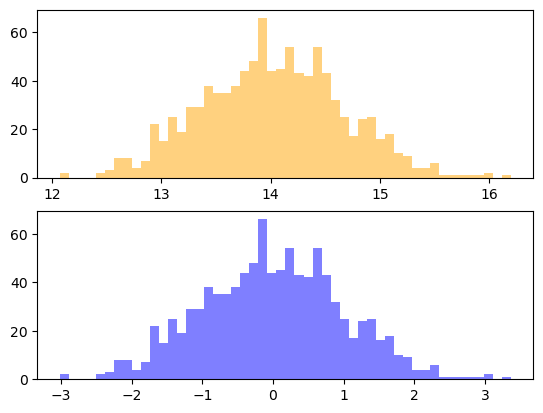

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.hist(data, bins=50, color="orange", alpha=0.5)
ax2.hist(standardised_data, bins=50, color="blue", alpha=0.5)
fig.show()

In [6]:
display(np.std(data))
display(np.std(standardised_data))

0.6460764888986383

1.0

In [7]:
squished_data_mean = 16
squished_data_std=0.2
spanned_data_mean = -80
spanned_data_std = 10

In [8]:
squished_data = norm.rvs(loc=squished_data_mean, scale=squished_data_std, size=1000)
spanned_data = norm.rvs(loc=spanned_data_mean, scale=spanned_data_std, size=1000)

In [9]:
Z_squished_data = (squished_data - np.mean(squished_data)) / \
    np.std(squished_data)
Z_spanned_data = (spanned_data - np.mean(spanned_data))/np.std(spanned_data)

In [10]:
minmax_squished_data = (squished_data - np.min(squished_data))/(np.max(squished_data) - np.min(squished_data))
minmax_spanned_data = (spanned_data - np.min(spanned_data))/(np.max(spanned_data) - np.min(spanned_data))

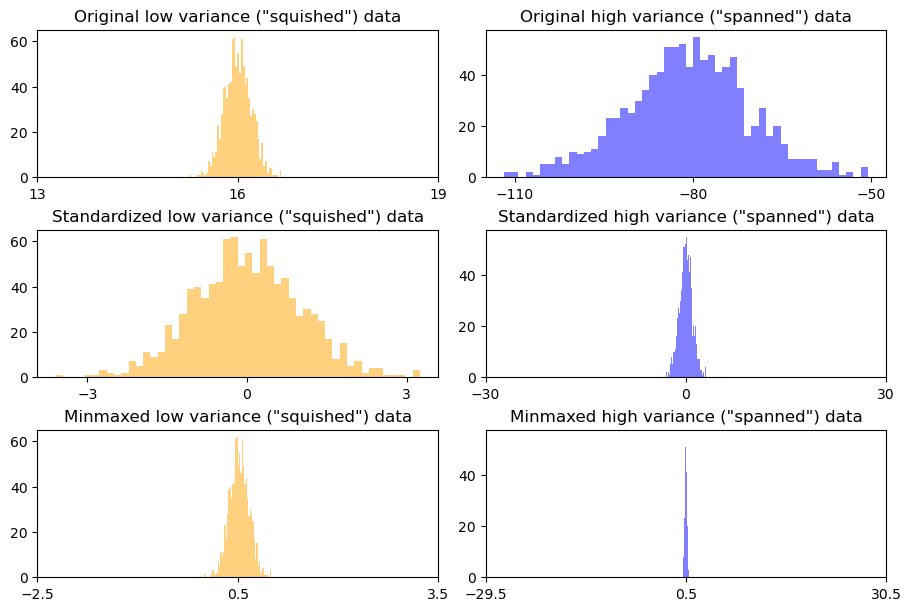

In [11]:
fig, axes = plt.subplots(nrows=3, ncols=2, constrained_layout=True, figsize=(9, 6))

# low varince ("squished") data

# 0,0
axes[0, 0].hist(squished_data, bins=50, color="orange", alpha=0.5)
axes[0, 0].set_xticks(
    ticks=[
        squished_data_mean - 3 * 1,
        squished_data_mean,
        squished_data_mean + 3 * 1,
    ]
)
axes[0, 0].set_title('Original low variance ("squished") data')

# 1,0
axes[1, 0].hist(Z_squished_data, bins=50, color="orange", alpha=0.5)
axes[1, 0].set_xticks(ticks=[0 - 3 * 1, 0, 0 + 3 * 1])
axes[1, 0].set_title('Standardized low variance ("squished") data')

# 2,0
axes[2, 0].hist(minmax_squished_data, bins=50, color="orange", alpha=0.5)
axes[2, 0].set_xticks(ticks=[0.5 - 3 * 1, 0.5, 0.5 + 3 * 1])
axes[2, 0].set_title('Minmaxed low variance ("squished") data')

# high varince ("spanned") data

# 0,1
axes[0, 1].hist(spanned_data, bins=50, color="blue", alpha=0.5)
axes[0, 1].set_xticks(
    ticks=[
        spanned_data_mean - 3 * spanned_data_std,
        spanned_data_mean,
        spanned_data_mean + 3 * spanned_data_std,
    ]
)
axes[0, 1].set_title('Original high variance ("spanned") data')


# 1,1
axes[1, 1].hist(Z_spanned_data, bins=50, color="blue", alpha=0.5)
axes[1, 1].set_xticks(
    ticks=[
        0 - 3 * spanned_data_std,
        0,
        0 + 3 * spanned_data_std,
    ]
)
axes[1, 1].set_title('Standardized high variance ("spanned") data')

# 2,1
axes[2, 1].hist(minmax_spanned_data, bins=50, color="blue", alpha=0.5)
axes[2, 1].set_xticks(
    ticks=[0.5 - 3 * spanned_data_std, 0.5, 0.5 + 3 * spanned_data_std]
)
axes[2, 1].set_title('Minmaxed high variance ("spanned") data')


fig.show()

Minmax se poradi s zapornymi daty. Standardizace ne. To se muze hodit napriklad kdyz mame chybejici hodnoty pro spojity priznak, ktery muze nabyvat zapornych hodnot. Pokud vyuzijeme standardizaci, jak muzeme oznacovat chybejici hodnoty? -1 uz neni dobra volba, protoze mohou existovat hodnoty mensi nez -1. Standardizace nepomuze. Zachrani nas Minmax, protoze zarucuje, ze data budou mezi 0 a 1. Ale samozreme ne vsechny modely si umeji poradit s chybejicimi daty pomoci nejake hodnoty jako -1 nebo jine (minimalni hodnota zmensena o 1).

In [13]:
print(f"Minmaxed high variance data with negative mean, minimum value: {np.min(minmax_spanned_data)}")
print(f"Standardized high variance data with negative mean, minimum value: {np.min(Z_spanned_data)}")

Minmaxed high variance data with negative mean, minimum value: 0.0
Standardized high variance data with negative mean, minimum value: -3.0417449204359306
